In [214]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavio
import wave
import sys
import matplotlib
import datetime
import csv
import pandas as pd

In [215]:
def getWavInt16Data(wavfile):
    wavreader = wave.open(wavfile,"r")
    wavbytes = wavreader.readframes(-1)
    wavdata =  np.fromstring(wavbytes, "Int16")
    return wavdata

In [216]:
"""
# Load the required libraries:
#   * scipy
#   * numpy
#   * matplotlib
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('Clapping.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[:,0], data[:,1], color='k') 
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot.png', dpi=100)
plt.show()
"""
"""
https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.plot.html
"""

'\nhttps://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html\nhttps://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.plot.html\n'

In [217]:
# def plot_masive_wav_point(wavfile=None):
#     print("current processing file is {}".format(wavfile))
# #     sr, wavary = wavio.read(wavfile)
    
#     audio = getWavInt16Data(wavfile)
#     audioLen = len(audio)
# #     print("wav-len:{}".format(len(audio)))
#     #max is 2^16 = 65536
# #     times = np.arange(audioLen/16000)
# #     print(times)
    
# #     print("total figs is {}".format(total_figs))
#     draw_base = 16000
#     sr = 16000
#     seconds_per_fig = 1
#     total_figs = int(np.ceil(audioLen/draw_base))
#     for i in range(total_figs):
#         clip = audio[i*draw_base:(i+1)*draw_base]
# #         clip_time = np.arange(times[i],times[i+3],1/16000)
# #         print(len(clip_time))
#         fig, ax = plt.subplots(1, figsize=[150,30],dpi=10)
#         ax.set_xlabel('time seconds')
#         ax.xaxis.label.set_size(100)
#         ax.set_ylabel('frequency Hz')
#         ax.yaxis.label.set_size(100)
        
#         ax.tick_params(axis='both', which='major', labelsize=80)
#         ax.plot(clip)
#         scale = 1e3
#         ticks = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
#         ax.yaxis.set_major_formatter(ticks)
#         def timeTicks(x, pos):
#             d = x/sr + i*seconds_per_fig
#             return str(d)
#         formatter = matplotlib.ticker.FuncFormatter(timeTicks)
#         ax.xaxis.set_major_formatter(formatter)
# #         x_coordinates = [10, 2000]
# #         y_coordinates = [2000, 2000]
# #         ax.plot(x_coordinates, y_coordinates,linewidth=40, color="r")
        
#         plt.show()
    
   

In [447]:
def plot_wav_points(wavfile=None):
    print("current processing file is {}".format(wavfile))
    
    audio = getWavInt16Data(wavfile)
    audioLen = len(audio)
    draw_base = 32000
    x_scale_base = 16000
#     data_per_100ms = 1600
#     data_per_25ms = 400
#     one_hundred_ms_per_second = 10
#     twenty_five_ms_per_second = 40
#     sr = 16000
#     seconds_per_fig = 1
    total_figs = int(np.ceil(audioLen/draw_base))
    point_size=10
    px=0
    py=0
    fig_offset = draw_base/x_scale_base
    csvfile = "../smic_speech_data_processing/csv_reports/int8_test_amy_1_lyrics.wav_CleanSpeech_20200320_15_03_42.csv"
    df = pd.read_csv(csvfile, dtype={'prediction':np.int8,'answer':np.int8})
    predictionAry = df["prediction"]
    total_csv_rows = df.shape[0]
    print("the raw wav length is {}".format(audioLen))
    print("total rows are {}".format(total_csv_rows))
    print("the raw wav lenght in 25ms is {}".format(np.ceil((audioLen-1200)/400)))
    points_per_fig = int(np.ceil(total_csv_rows/total_figs))
    print("points per figure are {}".format(points_per_fig))
#     pcolors = ['red', 'green','blue','orange']
#     plabels = ['ans0', 'ans1', 'pred1','pred0']
#     pys=[15000,17000,19000,21000]
#     pxs = [18000]*len(pys)
    
    for i in range(total_figs):
        clip = audio[i*draw_base:(i+1)*draw_base]
        fig, ax = plt.subplots(1, figsize=[150,50],dpi=10)
#         scatters = [matplotlib.pyplot.scatter(pxs,pys,color=c, s=5000) for c in pcolors]
#         ax.legend(pcolors, plabels,loc="upper left",labelspacing=20)
        ax.set_xlabel('time seconds')
        ax.xaxis.label.set_size(100)
        ax.set_ylabel('frequency kHz')
        ax.yaxis.label.set_size(100)
        
        ax.tick_params(axis='both', which='major', labelsize=80)
        ax.plot(clip,alpha=0.7)
        scale = 1e3
        ticks = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
        ax.yaxis.set_major_formatter(ticks)
        def timeTicks(x, pos):
            d = x/x_scale_base + (i * fig_offset) 
            return str(d)
        formatter = matplotlib.ticker.FuncFormatter(timeTicks)
        ax.xaxis.set_major_formatter(formatter)
#         test_points = [1,0,1,1,1,0,0,1,1]
        start = i*points_per_fig
        end = (i+1)*points_per_fig
        print("df start is {} and end is {}".format(start,end))
        small_df_ans = df["answer"][start:end]
        small_df_pred = df["prediction"][start:end]
        # two seconds contain 32000/400 = 80 points
        try:
            for p in range(len(small_df_ans)):
                idx = p + start
                if small_df_ans[idx] == 1:
                    ax.scatter(p*400,20000,1000,c="g")
                else:
                    ax.scatter(p*400,2000,1000,c="r")
                    
            for k in range(len(small_df_pred)):
                idx = k + start
                if small_df_pred[idx] == 1:
                    ax.scatter(k*400,18000,1000,c="blue")
                else:
                    ax.scatter(k*400,3400,1000,c="orange")
            
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
        
        plt.show()

current processing file is ../../speechData/clean_speech/MIR-1K/amy_1_lyrics.wav
the raw wav length is 488448
total rows are 1217
the raw wav lenght in 25ms is 1219.0
points per figure are 77
df start is 0 and end is 77


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


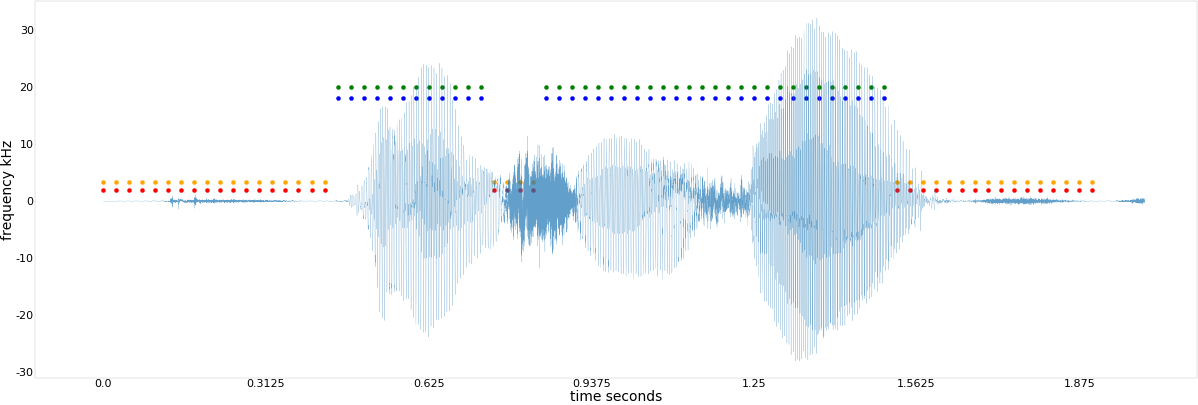

df start is 77 and end is 154


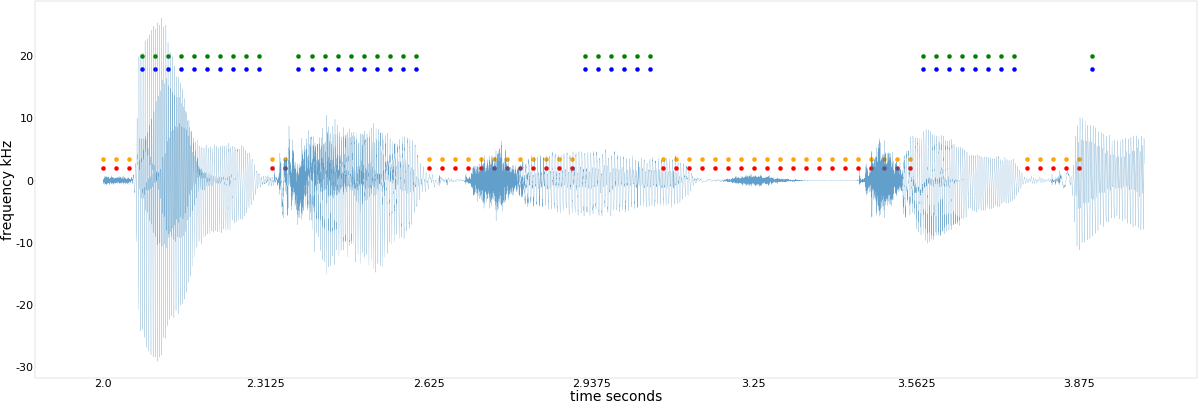

df start is 154 and end is 231


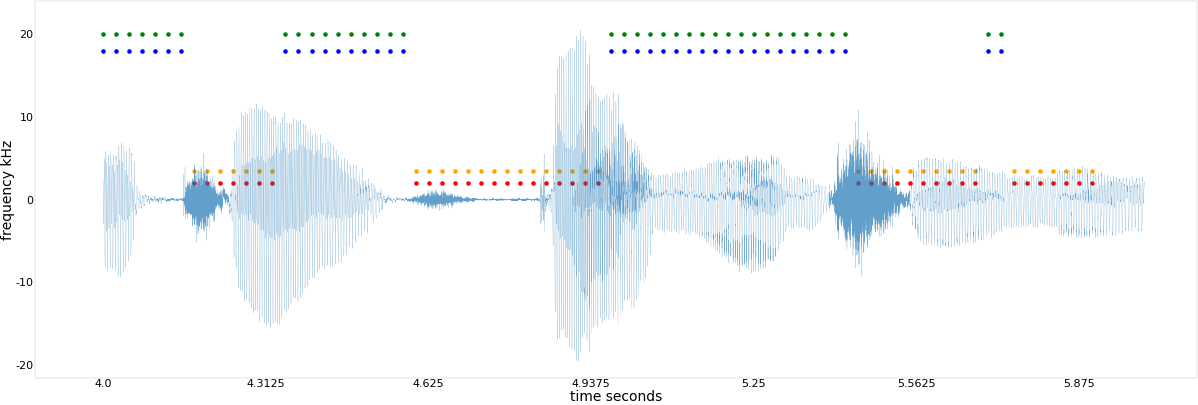

df start is 231 and end is 308


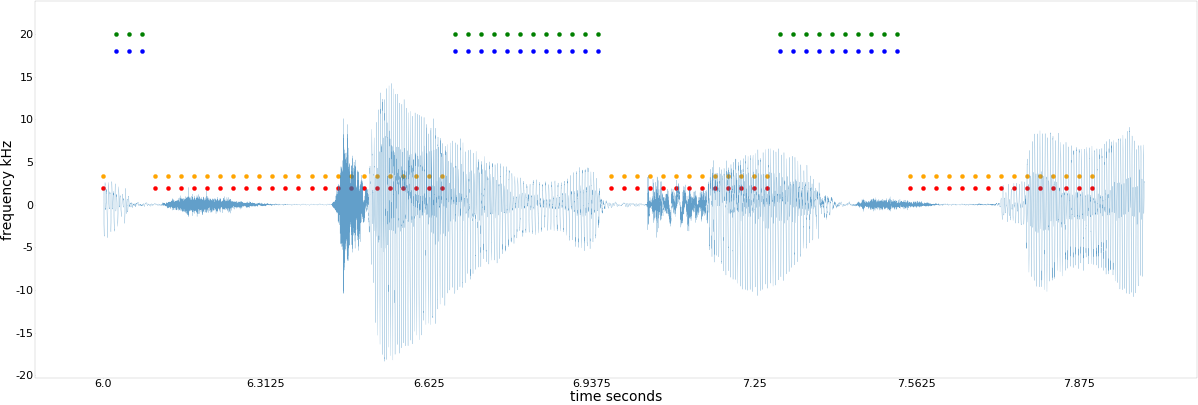

df start is 308 and end is 385


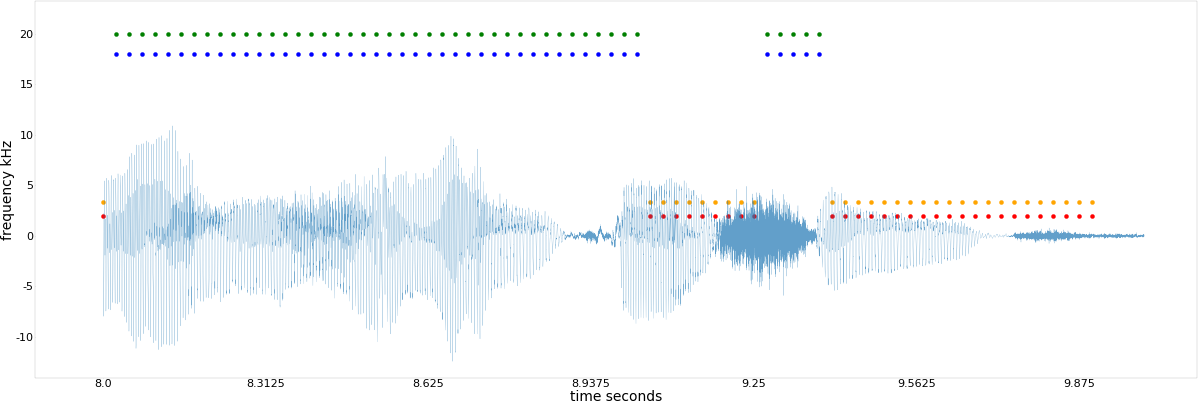

df start is 385 and end is 462


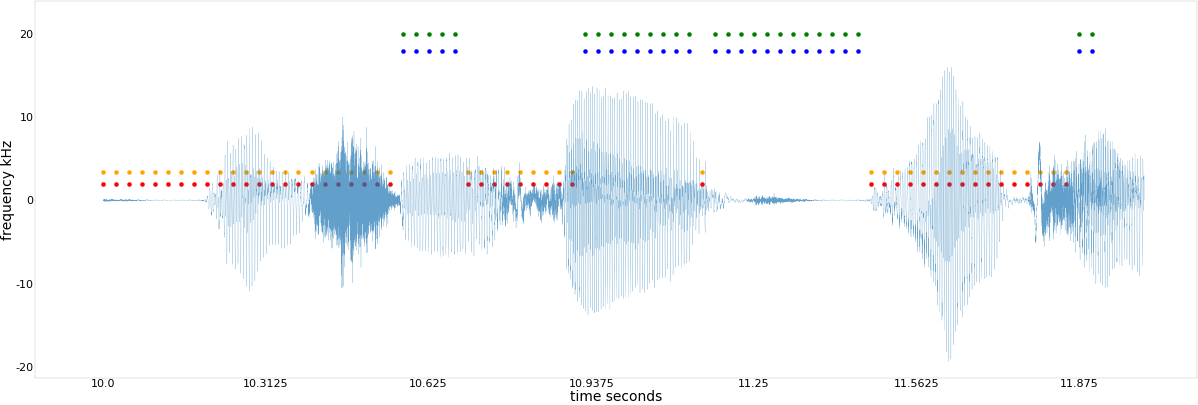

df start is 462 and end is 539


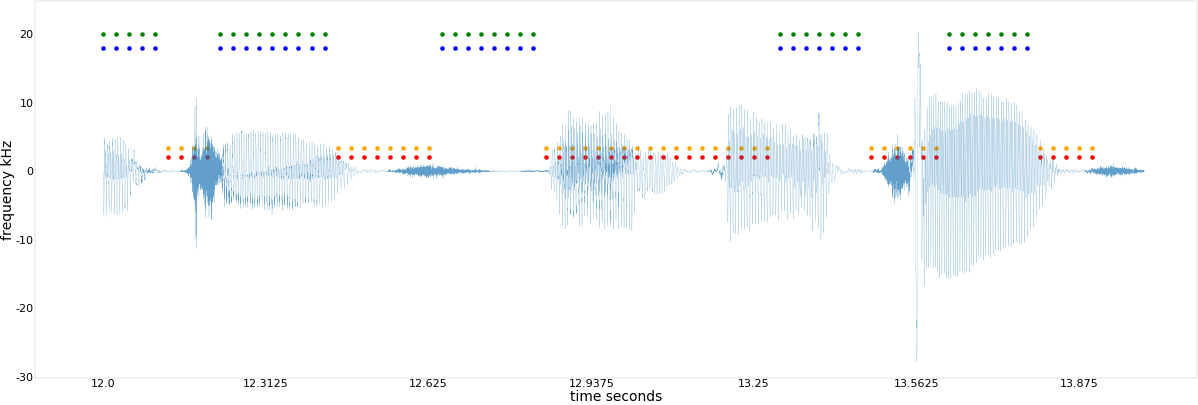

df start is 539 and end is 616


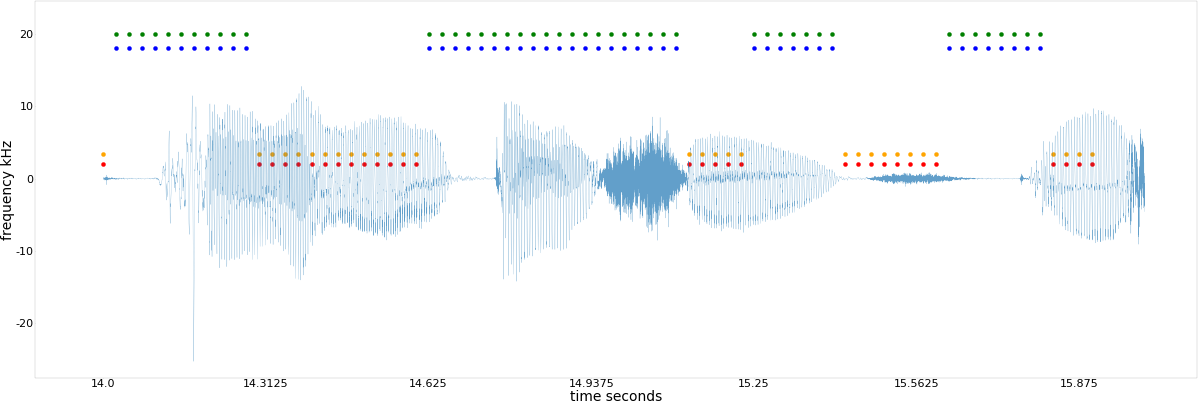

df start is 616 and end is 693


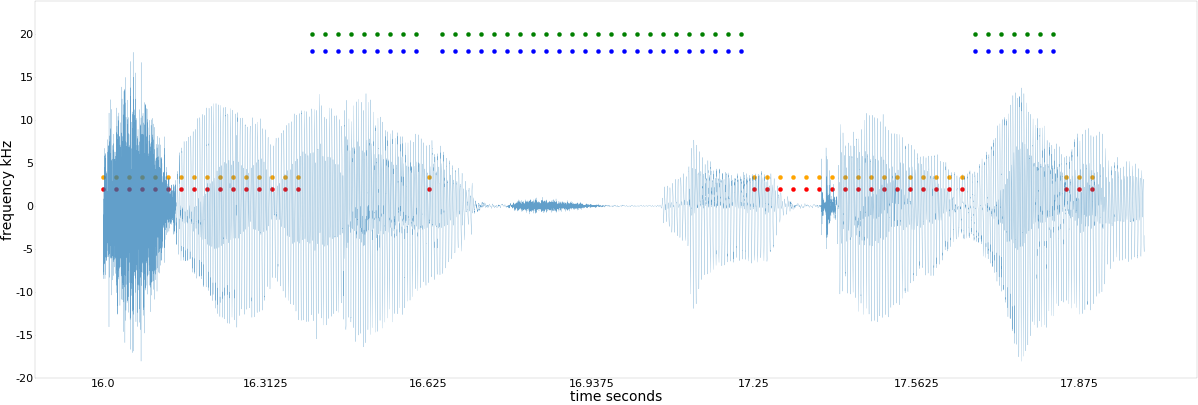

df start is 693 and end is 770


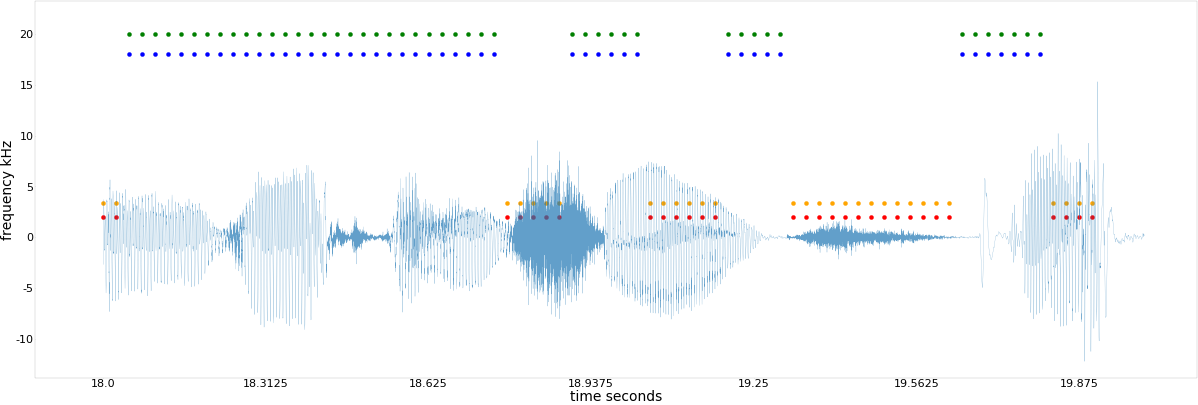

df start is 770 and end is 847


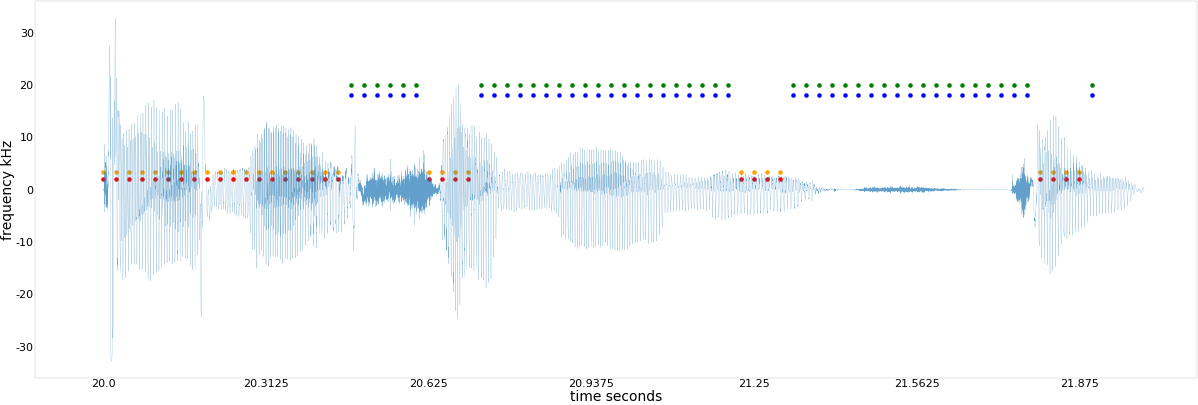

df start is 847 and end is 924


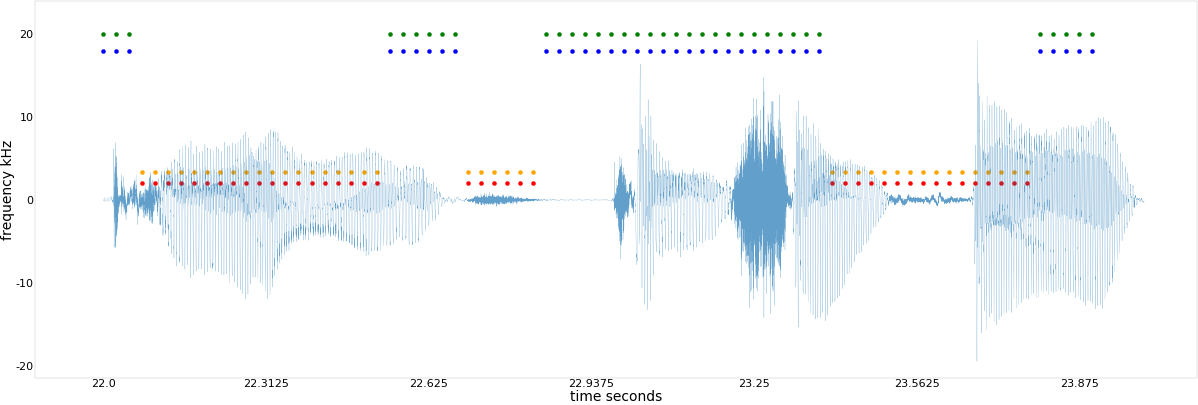

df start is 924 and end is 1001


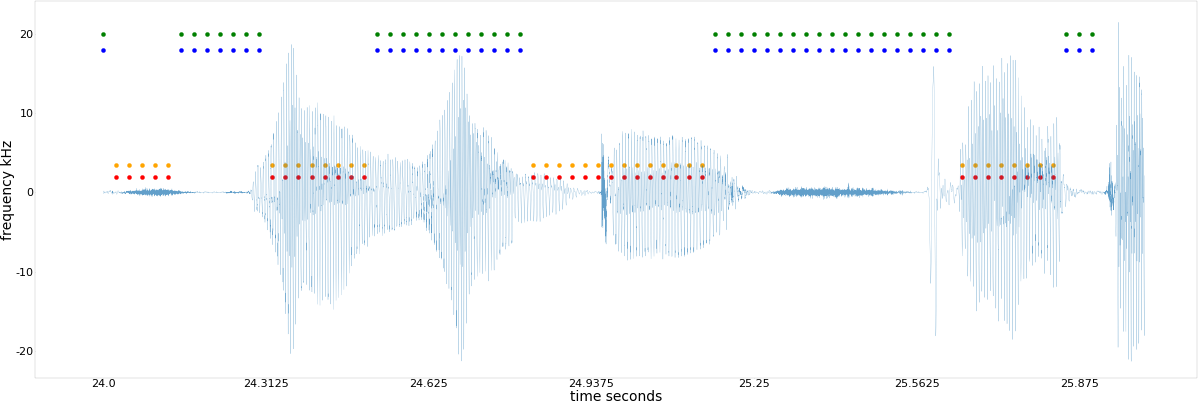

df start is 1001 and end is 1078


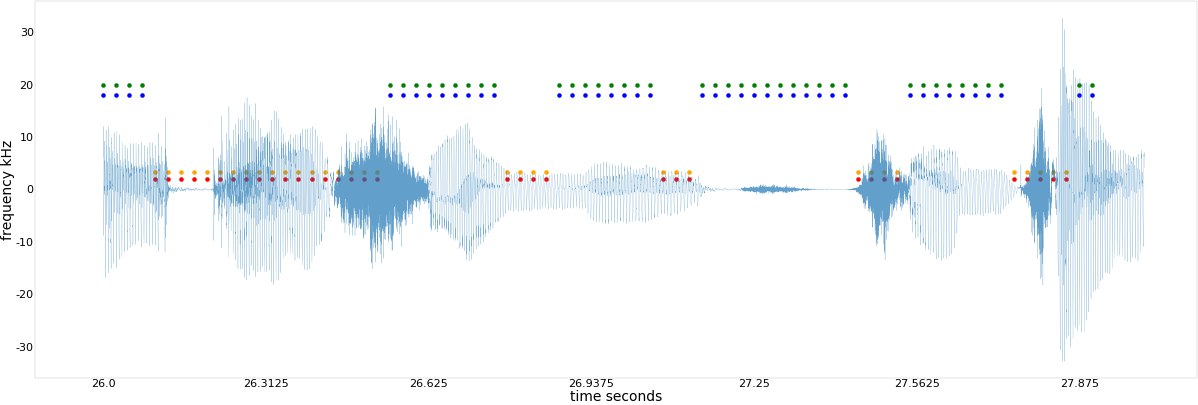

df start is 1078 and end is 1155


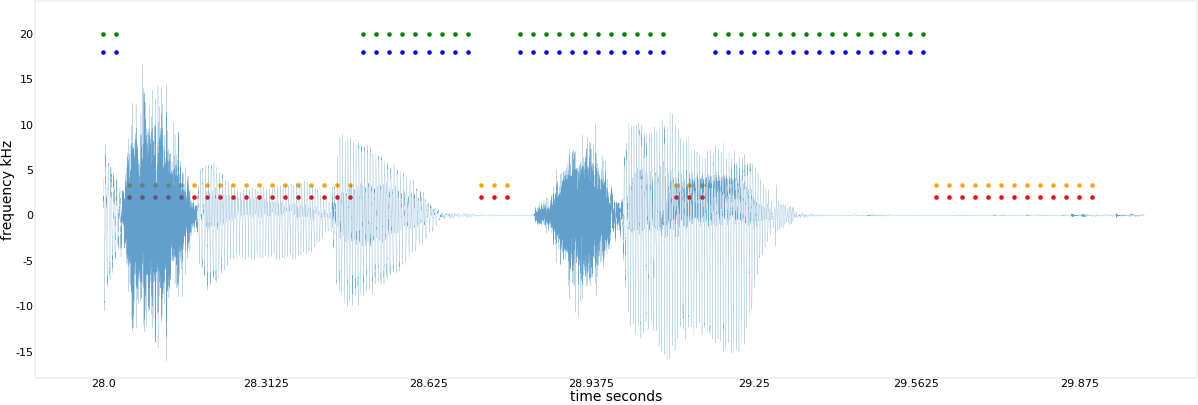

df start is 1155 and end is 1232


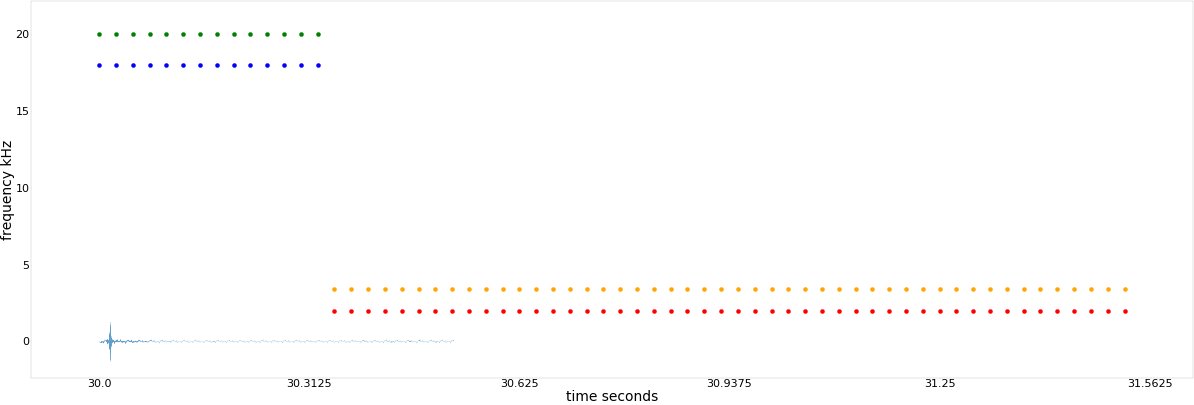

In [448]:
currentDir = os.getcwd()
# processing_file = currentDir+"/theData/amy_1_lyrics.wav"
processing_file = "../../speechData/clean_speech/MIR-1K/amy_1_lyrics.wav"
plot_wav_points(processing_file)